## LAB 6 - GAUSSIAN MIXTURE MODELS AND KMEANS (27.01.2025)

## AIM
To apply KMeans and Gaussian Mixture Models on a dataset and compare their results.

## ALGORITHM

1. **Import modules and Load the dataset**
- Import all the modules needed to acclomplish the task.
- Load the wine dataset which has features 'alcohol','malic_acid','ash','alcalinity_of_ash','magnesium','total_phenols','flavanoids','nonflavanoid_phenols','proanthocyanins','color_intensity','hue','od280/od315_of_diluted_wines','proline'.

2. **Create a data frame**
   
Make the dataset into a DataFrame, including the target variable for clear understanding.

3. **Perform initial data exploration**
   
Describe the data and get information on it. Check if any of the features have missing values.

4. **Split the data into features and target**
 - Features (X): The input variables.
 - Target (y): The output variable (Which class 0,1 or 2 the wine belongs to).

5. **Train the model**
   
 - Initialize a Gaussian Mixture Model (GMM) with 3 components (clusters).
 - Fit the model to the data to identify the clusters.

6. **Evaluate Clustering for GMM**

Print the Adjusted Rand Index, Homogeneity Score, and Completeness Score to evaluate the quality of clustering.

7. **Dimensionality Reduction (PCA)**

Use Principal Component Analysis (PCA) to reduce the data from 13 features to 2 dimensions (for visualization).

8. **Plot Clusters for GMM**

- Create a scatter plot with the 2D reduced data and color the points by their predicted cluster labels.
- Label the axes and display a color bar to show the cluster assignments.

9. **Initialize and fit KMeans model**

- Initialize the KMeans model with n_clusters=3 (since there are 3 wine classes).
- Fit the KMeans model to the data.

10.  **Evaluate Clustering for KMeans**

Print the Adjusted Rand Index, Homogeneity Score, and Completeness Score to evaluate the quality of clustering.

11. **Plot Clusters for KMeans**

- Create a scatter plot with the 2D reduced data (already done for GMM) and color the points by their predicted cluster labels.
- Label the axes and display a color bar to show the cluster assignments.


## DESCRIPTION
A Gaussian Mixture Model (GMM) is a probabilistic model that represents a mixture of multiple Gaussian distributions, each with its own mean and covariance. It is used for modeling data that might be generated from a combination of several Gaussian distributions, especially when the data contains multiple sub-populations or groups.

KMeans is an unsupervised learning algorithm used for partitioning data into K distinct clusters based on their similarity. It is based on minimizing the within-cluster variance (sum of squared distances between data points and the centroid of the cluster).

## CODE AND OUTPUT

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, homogeneity_score, completeness_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [3]:
data = load_wine()
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df["Wine Class"]=data.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Wine Class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [4]:
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
Wine Class                      0
dtype: int64

In [5]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Wine Class
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [6]:
X = df.drop(["Wine Class"], axis=True)
y = df["Wine Class"]

In [7]:
gmm = GaussianMixture(n_components=3,random_state=42)
gmm.fit(X)

GaussianMixture(n_components=3, random_state=42)

In [8]:
gmm_predict = gmm.predict(X)

In [9]:
print("Adjusted Random Score:",adjusted_rand_score(y,gmm_predict)) #How well predicted and tru labels match

Adjusted Random Score: 0.6074836799117163


In [10]:
print("Homogeneity Score:",homogeneity_score(y,gmm_predict)) #How well the clustering groups data points that belong to the same true class together

Homogeneity Score: 0.5849293575003643


In [11]:
print("Completeness Score:",completeness_score(y,gmm_predict)) #How well all the data points from the same true class were grouped together into the same cluster

Completeness Score: 0.5797788158435416


In [12]:
pca = PCA(n_components=2)
X_pca=pca.fit_transform(X)

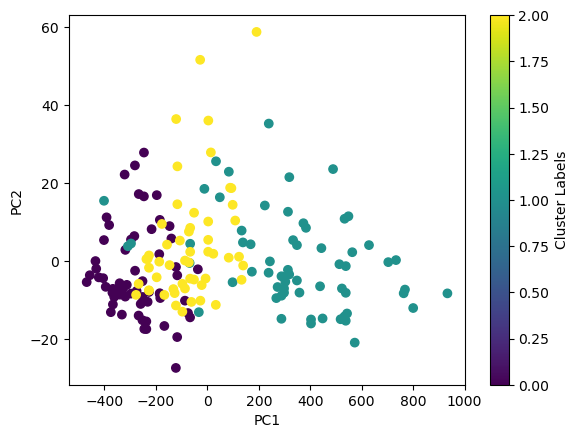

In [13]:
plt.scatter(X_pca[:,0],X_pca[:,1],c=gmm_predict,cmap='viridis',marker='o')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label="Cluster Labels")
plt.show()

In [14]:
data.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [15]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [16]:
kmeans_predict = kmeans.predict(X)

In [17]:
print("Adjusted Rand Score:", adjusted_rand_score(y, kmeans_predict))

Adjusted Rand Score: 0.37111371823084754


In [18]:
print("Homogeneity Score:", homogeneity_score(y, kmeans_predict))

Homogeneity Score: 0.4288123199785647


In [19]:
print("Completeness Score:", completeness_score(y, kmeans_predict))

Completeness Score: 0.4287014138944859


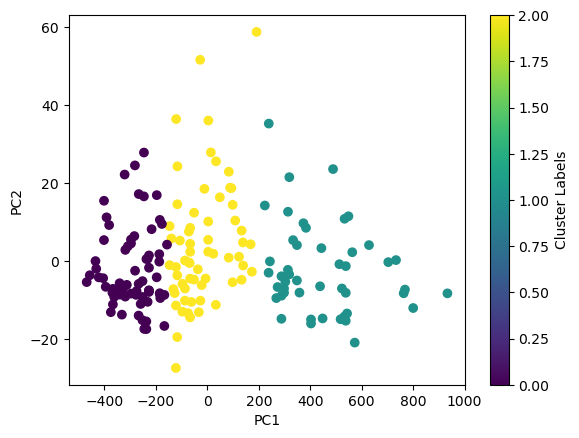

In [20]:
plt.scatter(X_pca[:,0],X_pca[:,1],c=kmeans_predict, cmap='viridis',marker='o')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label="Cluster Labels")
plt.show()

## RESULT
Gaussian Mixture Model (GMM) generally produces higher clustering performance scores (ARI, Homogeneity, Completeness) compared to KMeans, as GMM better captures the underlying data distribution with its flexibility for non-spherical clusters.